# Preparation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv('data_mahasiswa.csv', sep=';')

# EDA

In [4]:
data.head(5)

,NAMA,TINGGI,BERAT_BADAN
0,M. ADE NOVAL FIRMANSYAH,176,78
1,IKHLASUL AMAL AWALUDIN,165,55
2,ARIFFULAH,170,53
3,AIDA NUR SYA'BANI,167,54
4,ARIEF RACHMAN,169,60


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   NAMA         32 non-null     object
 1   TINGGI       32 non-null     int64 
 2   BERAT_BADAN  32 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 900.0+ bytes


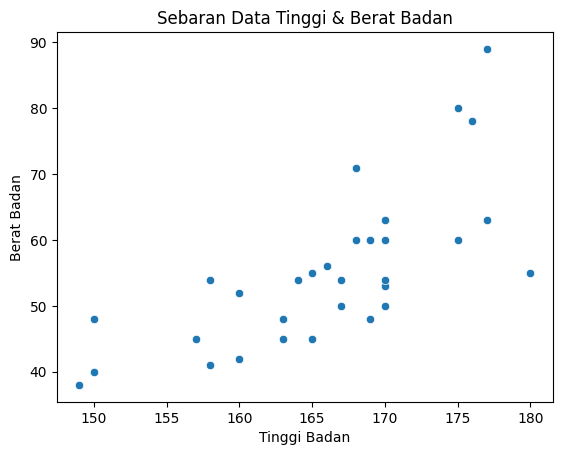

In [6]:
sns.scatterplot(x=data['TINGGI'], y=data['BERAT_BADAN'])
plt.title('Sebaran Data Tinggi & Berat Badan')
plt.xlabel('Tinggi Badan')
plt.ylabel('Berat Badan')
plt.show()

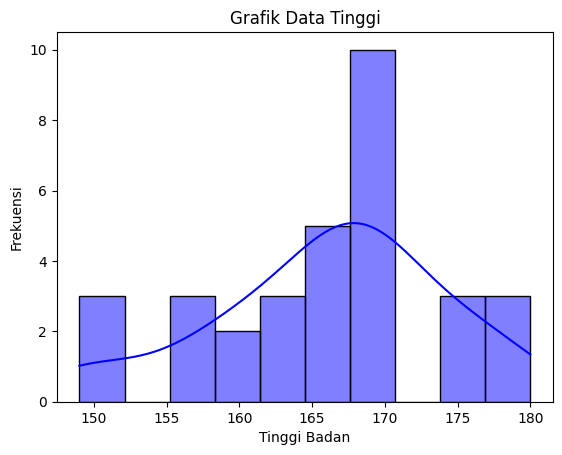

In [7]:
sns.histplot(data['TINGGI'], bins=10, kde=True, color='blue')
plt.title('Grafik Data Tinggi')
plt.xlabel('Tinggi Badan')
plt.ylabel('Frekuensi')
plt.show()

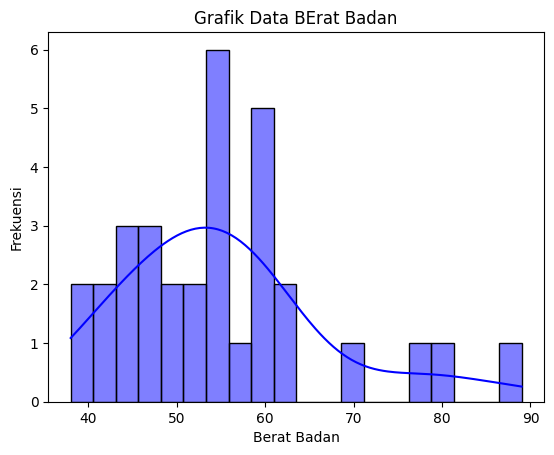

In [8]:
sns.histplot(data['BERAT_BADAN'], bins=20, kde=True, color='blue')
plt.title('Grafik Data BErat Badan')
plt.xlabel('Berat Badan')
plt.ylabel('Frekuensi')
plt.show()

# Outlier With Boxplot

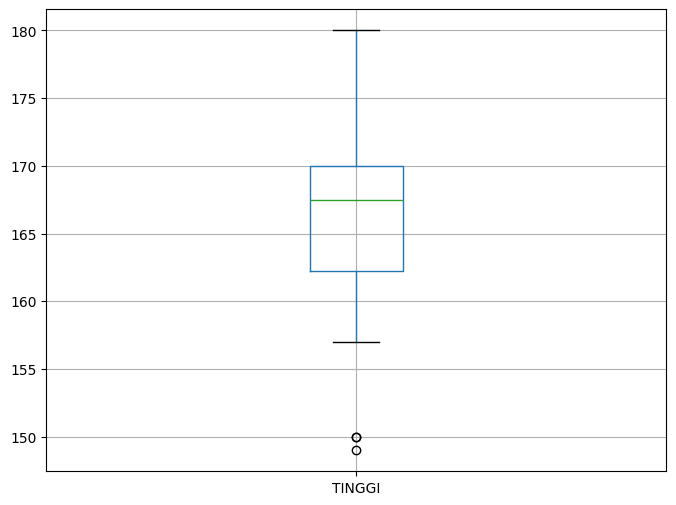

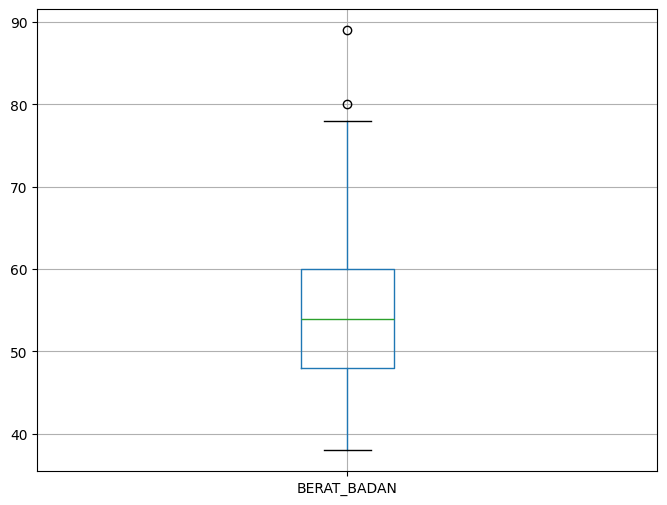

In [9]:
numericColumns = ['TINGGI', 'BERAT_BADAN']

for column in data[numericColumns]:
    plt.figure(figsize=(8, 6))
    data.boxplot(column=[column])

# K-Means Clustering

In [10]:
numericColumns = ['TINGGI', 'BERAT_BADAN']
dataNum = data[numericColumns]

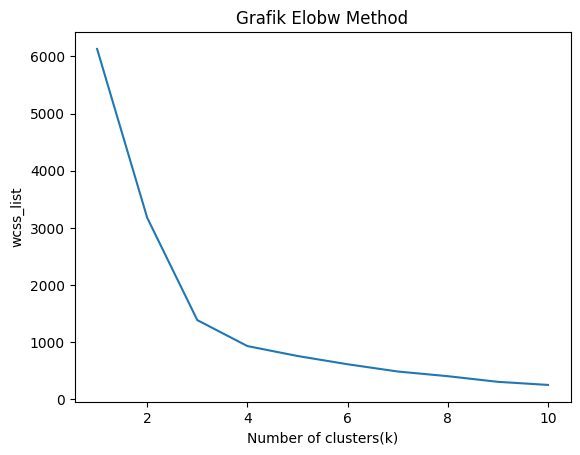

In [11]:
wcss_list = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(dataNum)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss_list)
plt.title('Grafik Elobw Method')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show() 

In [12]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
y_means = kmeans.fit_predict(dataNum)

In [13]:
dataNum['cluster'] = y_means

In [14]:
kmeans.cluster_centers_

array([[174.        ,  79.5       ],
       [164.96428571,  51.89285714]])

In [15]:
dataNum.groupby('cluster').mean()                                       

,TINGGI,BERAT_BADAN
cluster,,
0,174.000000,79.500000
1,164.964286,51.892857


In [16]:
# Menghitung deskripsi statistik untuk kolom TINGGI berdasarkan cluster
tinggi_stats = dataNum.groupby("cluster")["TINGGI"].describe()
tinggi_stats

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,4.0,174.000000,4.082483,168.0,173.25,175.5,176.25,177.0
1,28.0,164.964286,7.666580,149.0,160.00,166.5,170.00,180.0


In [17]:
berat_badan_stats = dataNum.groupby("cluster")["BERAT_BADAN"].describe()
berat_badan_stats

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,4.0,79.500000,7.416198,71.0,76.25,79.0,82.25,89.0
1,28.0,51.892857,7.140595,38.0,47.25,53.5,57.00,63.0


In [18]:
agrupador_kmeans = KMeans(n_clusters = 2)
labels_kmeans = agrupador_kmeans.fit_predict(dataNum)
print("Labels K-means: ", labels_kmeans)

Labels K-means:  [1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0]


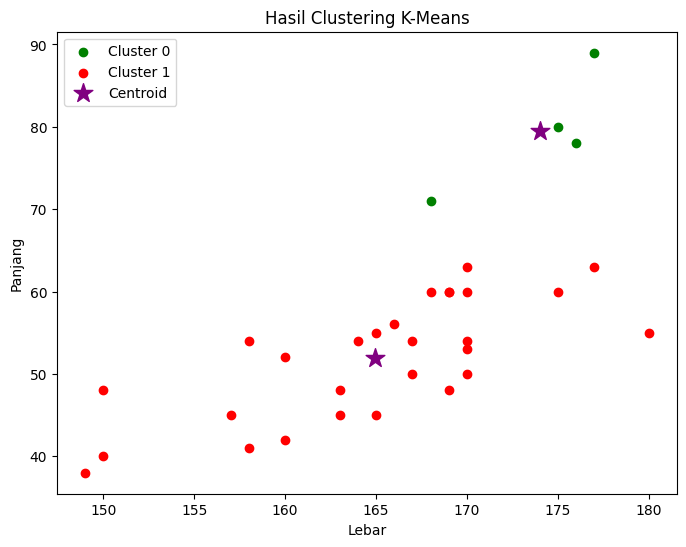

In [19]:
# Membuat plot hasil clustering
plt.figure(figsize=(8,6))
plt.title('Hasil Clustering K-Means')
plt.xlabel('Lebar')
plt.ylabel('Panjang')

data1 = dataNum[dataNum.cluster == 0]
data2 = dataNum[dataNum.cluster == 1]

plt.scatter(data1['TINGGI'], data1['BERAT_BADAN'], color='green', label='Cluster 0')
plt.scatter(data2['TINGGI'], data2['BERAT_BADAN'], color='red', label='Cluster 1')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            color='purple', marker='*', s=200, label='Centroid')

plt.legend()

plt.show()